   #                        1.  Lotto Dynamics in Integer Space

We find a proper model to represent the dynamics of the system in positive integer space [1 to 69] using random number generator. With this model we  run Hybrid Montecarlo(HMC) algorithm to thermalize the system to determine most probable values of quantities like: average absolute difference, root mean square absolute difference and most probable absolute difference, which are helpful to determine the most probable vectors in sample space.

-----------------------------------------------------------------------------------------------------------------------

Import some libraries

In [1]:
import random as random
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import math as math
import pandas

In [2]:
%matplotlib inline

Maximum no in range of lottery

In [3]:
Max = 69

This function generates 5 random samples between 1 to 65.

In [4]:
def sample_generator(Max):
    x =     np.sort(random.sample(range(1,Max), 5) ) 
    return x

---------------------

## 1.1.  Construction of a Toy Model

For example, considering range of sample equal to 50, among millions of sample one gets:

   - mean of first no : 5
   - mean of second no :15
   - mean of third no :25
   - mean of  fourth no:35
   - mean of fifth no:45

   We consider these mean values as equilibrium point of each oscillator. Oscillators oscillate in integer Space. Each sample of lottery is some state of oscillator. There will be total of (50x49x48x47x46/5!) states. We can choose best modle of oscillator by making a study of correlation cofficients among digits in each sample. Here we have proposed 3 model where model I and II are special case of Model III.

### 1.1.1.   Model Selection with Proper Action

<img src="https://sites.science.oregonstate.edu/~roundyd/COURSES/ph427/figs/ring-of-oscillators.svg" width = 200 height =200>

Let us define a skewsymmetric distance matrix  by taking difference between digits in sample as the matrix elements. There is one distance matrix per sample.

\\(D_{ij} =  (x_{i}-x_{j})\\)

ie. 
\\( D = \left( \begin{array}{ccc}
0 & \color{blue}{(x_{1}-x_{2})} & (x_{1}-x_{3})& (x_{1}-x_{4}) & (x_{1}-x_{5}) \\
(x_{2}-x_{1}) & 0 & \color{blue}{(x_{2}-x_{3})}& (x_{2}-x_{4}) & (x_{2}-x_{5}) \\
(x_{3}-x_{1}) & (x_{3}-x_{2}) & 0& \color{blue}{(x_{3}-x_{4})} & (x_{3}-x_{5}) \\
(x_{4}-x_{1}) & (x_{4}-x_{2}) & (x_{4}-x_{3})& 0 & \color{blue}{(x_{4}-x_{5})} \\
\color{blue}{(x_{5}-x_{1})} & (x_{5}-x_{2}) & (x_{5}-x_{3})& (x_{5}-x_{4}) & 0 \\
\end{array} \right) \\)

Taking (N = 5) oscillators  with flexibility between seperation of numbers as spring constant (K=1). Simple  model of Action can be defined by taking single updiagonal terms only as:

##### Model-I (Linear)

\\( L = \frac{1}{2}K[(x_1 -x_2)^2 +(x_2 -x_3)^2 + (x_3 -x_4)^2 + (x_4 -x_5)^2 ] \\)

##### Model-II (Linear &Periodic)

\\( L = \frac{1}{2}K[(x_1 -x_2)^2 +(x_2 -x_3)^2 + (x_3 -x_4)^2 + (x_4 -x_5)^2 + (x_5 -x_1)^2 ] \\)

Considering effect of all terms in distance matrix one can define new model of Action as:

##### Model - III (Quadratic & Periodic)

\\( L = Tr(D^{\dagger}KD) \\)

$\color{red}{Warning:}$ Since each digit are not equally correlated to eachother, this form of action should be corrected by choosing appropriate spring constant for crossed terms like $x_{3}x_{4}$. K is another matrix(or tensor) of spring constants which can be determined by finding correlation cofficients between digits within several samples.

--------------------------

### 1.1.2. Study of Distance Matrix 

We can make skew symmetric matrix into traceless symmetric matrix by taking absolute value of each elements.

In [5]:
def distance_matrix(x):
    D = [[0.0 for k in range(5)]for l in range(5)]
    for k in range(5):
        for l in range(5):
            D[k][l] = abs(x[k]-x[l])
    return D       

Lets have a look of distance matrix:

In [6]:
distance_matrix(sample_generator(Max))

[[0, 9, 24, 39, 44],
 [9, 0, 15, 30, 35],
 [24, 15, 0, 15, 20],
 [39, 30, 15, 0, 5],
 [44, 35, 20, 5, 0]]

We can generate a small bucket of  9 distance matices to visualize distribution of distances.

In [7]:
M = [np.array([[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]) for k in range(9)]
for k in range(9):
    M[k] = np.array(distance_matrix(x = sample_generator(Max)))

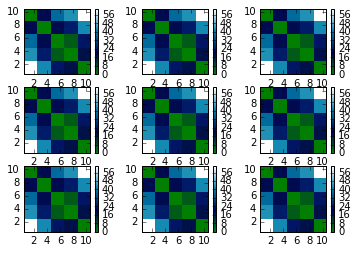

In [8]:
for k in range(9):
    plt.subplot(3,3,k+1)
    plt.imshow(M[0], interpolation='nearest', cmap=plt.cm.ocean, extent=(0.5,10.5,0.5,10.5))
    plt.colorbar()

plt.show()

#### 1.1.2.1 Enasmble of Distance matrices

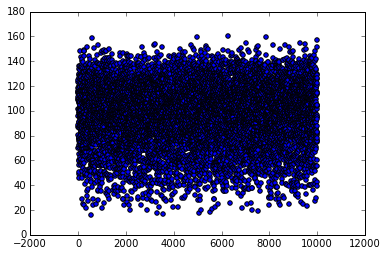

In [10]:
wstor_III = []
for k in range(10000):
    x = sample_generator(Max)
    A = distance_matrix(x)
    w, v = LA.eig(A)
    #print max(w)
    #for l in range(5):
        #wstor.append(abs(w[l]))
    wstor_III.append(max(w))
    plt.scatter(k,max(w))

Principle component of eigen values helps us to predict better model by dominancy of principle direction.

#### Principle Component Analysis - Model -III

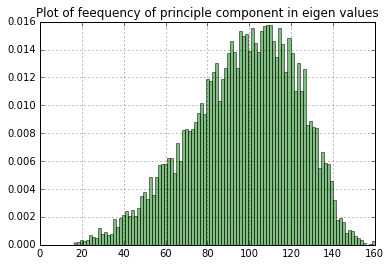

In [11]:
num_bins = 100
plt.grid()
plt.title("Plot of feequency of principle component in eigen values")
plt.hist(wstor_III,num_bins, normed= 1.0, facecolor='green', alpha = 0.5)
plt.show()

#### Principle Component Analysis - Model - II

In model - II , distance matrix becomes diagonal matrix and hence eigen values are diagonal elements themselves. We can plot distribution of largest difference.

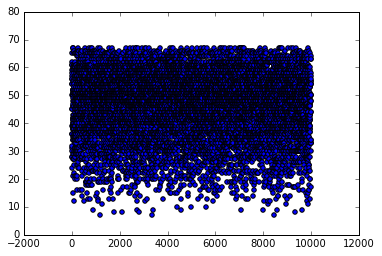

In [13]:
wstor_II = []
for k in range(10000):
    x = sample_generator(Max)
    A = distance_matrix(x)
    w = max(A[0][1],A[1][2],A[2][3],A[3][4],A[4][0])
    wstor_II.append(w)
    plt.scatter(k,w)

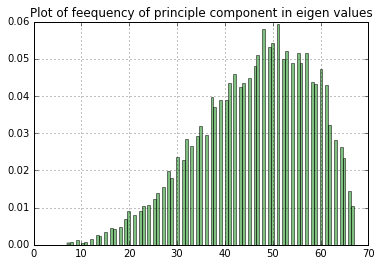

In [14]:
num_bins = 100
plt.grid()
plt.title("Plot of feequency of principle component in eigen values")
plt.hist(wstor_II,num_bins, normed= 1.0, facecolor='green', alpha = 0.5)
plt.show()

$\color{blue}{Conclusion}$ : Most of the distance matrices have principle component around 100. Principle compont depends on all distances. Therefore other distances can not be ignored in action. New action should be defined in term of Distance matrix.

--------------------------------------------------------

### 1.1.3. Statistical Analysis & Determination of Spring Constants

#### 1.1.3.1.  Study of Variance-Covariance  Matrix of samples

 Study of Variance-Covariance help us to determine the spring constant(K) in our model which is ultimately related to the correlation coffecient. We construct Variance-Covariance Matirx by using 100 samples in the following steps:

 * 1 . Lets construct a bag of Nbag = 1000 samples.

In [9]:
Nbag = 1000

In [10]:
SampleBag = [sample_generator(Max) for k in range(Nbag)]

* 2 . Vectorization of 100 samples : where first digit from each sample goes to first column vector  of Vec matrix etc.

In [11]:
def vactorization(SampleBag):
    Vec = [[0 for k in range(Nbag)]for l in range(5)]
    for l in range(5): 
        for k in range(Nbag):
            Vec[l][k] = SampleBag[k][l]
    return np.array(Vec)


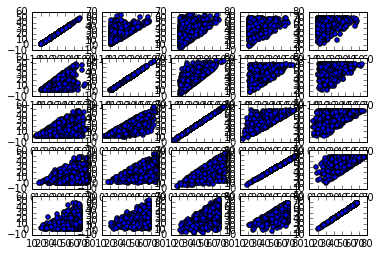

In [12]:
SB = vactorization(SampleBag)
p = 1
for l in range(5):
    for r in range(5):
        plt.subplot(5,5,p)
        plt.scatter(SB[l],SB[r])
        p = p+1
plt.show()

* 3 . Normalization brings each column vector to have mean equal to zero which helps to visualize variance-covariance of samples.

In [13]:
def normalization(Vec):
    mn = [0 for k in range(5)]
    vr = [0 for k in range(5)]
    rng = [0 for k in range(5)]
    numVec =  [[0 for k in range(Nbag)]for l in range(5)]
    #Find mean and range (Maximum-minimum) of each vector
    for l in range(5): 
        mn[l] = np.mean(Vec[l])
        vr[l] = np.var(Vec[l])
        for k in range(Nbag):
            numVec[l][k] = (SampleBag[k][l] - mn[l])/(math.sqrt(vr[l]/float(Nbag)))
            numVec = np.array(numVec)
    return numVec
       

#####  1.1.3.2.a. Variance-Covariance of Raw samples

In [14]:
Vec = vactorization(SampleBag)

In [15]:
VCM_raw  = np.cov(Vec)

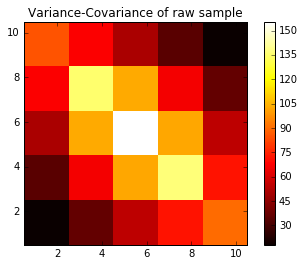

In [16]:
plt.title("Variance-Covariance of raw sample")
plt.imshow(VCM_raw, interpolation='nearest', cmap=plt.cm.hot, extent=(0.5,10.5,0.5,10.5))
plt.colorbar()
plt.show()

##### 1.1.3.2.b. Variance-Covariance of Normalized samples : Crrelation cofficients

In [17]:
Vec = vactorization(SampleBag)
numVec = normalization(Vec)

In [18]:
VCM_normalized = np.cov(numVec)

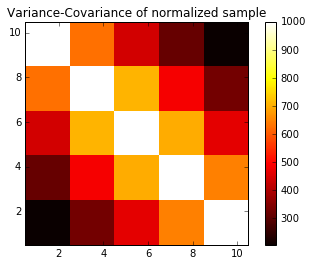

In [19]:
plt.title("Variance-Covariance of normalized sample")
plt.imshow(VCM_normalized, interpolation='nearest', cmap=plt.cm.hot, extent=(0.5,10.5,0.5,10.5))
plt.colorbar()
plt.show()

### 1.1.3.3. Spring Constants

Matrix of spring constants is a symmetric tensor which can be given by square root of normalized correlation cofficients.

In [20]:
K = np.sqrt(VCM_normalized/max(VCM_normalized[0]))
K

array([[ 1.        ,  0.79287801,  0.66542652,  0.56166262,  0.45306335],
       [ 0.79287801,  1.        ,  0.84281867,  0.69757696,  0.57453966],
       [ 0.66542652,  0.84281867,  1.        ,  0.83777405,  0.68199933],
       [ 0.56166262,  0.69757696,  0.83777405,  1.        ,  0.80502696],
       [ 0.45306335,  0.57453966,  0.68199933,  0.80502696,  1.        ]])

 --------------------------

$\color{blue}{\text{Improved Action}}: \boxed{L =  D^{\dagger}KD}$ with K-matrix found above.

----------------------

## 1.2 Montecarlo Simulation 

*  One can calculate the most probable difference vector using Hybrid Monrtecarlo Algorithm.

Total energy of the system of (N=100) coupled oscillator in integer space can be expressed as:

$H =  \sum_{i=1}^{N} D^{\dagger}KD $

Define some useful function for thermalization

In [21]:
def action(D):
    '''D = distance matrix'''
    '''K = spring constant tensor'''
    h = np.dot(D,np.dot(K,D))
    htr = np.trace(h)
    return htr    

In [22]:
def hot_start():
    '''N = total no of coupled oscillators in the system '''
    '''U = bag of N oscillators'''
    U = []
    for k in range(N):
        x = sample_generator(Max)
        U.append(x)
    return U

In [23]:
def cold_start():
    '''N = total no of coupled oscillators in the system '''
    '''U = bag of N oscillators'''
    U = []
    for k in range(N):
        x = [1,1,1,1,1]
        U.append(x)
    return U

In [24]:
def hamiltonian(U):
    '''H = total hamiltonian'''
    H = 0
    for k in range(N):
        D =   distance_matrix(U[k])
        h = action(D)
        H  = H+h
    return H

In [25]:
def pick_random_particle(printkey):
    n = random.randint(0, N-1)
    if printkey == 1: print "oscillator picked  at",n
    return n

In [26]:
def value_shifter(u,dx):
    u = u + dx
    for k in range(len(u)):
        if u[k] < 0:
            u[k] = Max + u[k]
        elif u[k]>69:
            u[k] = u[k]%Max
    u = np.sort(u)        
    return u

In [27]:
dv = 10
Kb = 1.0
T = 100
N = 20

--------------------

### 1.2.1 Thermalization 

In [28]:
def thermalize(U,T,nruns,printkey):
    irun = 0
    h_stor = [0.0 for k in range(nrun)]
    U_stor = []
    count = 0
    while irun < nrun:
            h_old = hamiltonian(U)
              
            n = pick_random_particle(printkey)
            ov = U[n] 
            dx = random.sample(range(-dv,dv), 5)
            U[n] = value_shifter(U[n],dx)
           
              
                
            h_new = hamiltonian(U)
                
            dh = h_new - h_old
            if printkey == 1:print  "=================", irun,"====================" 
                    
            if dh < 0:
                    count = count+1  
                    if printkey == 1: print irun, "Energy decreased! It is accepted!",dh
                    if printkey ==3:  print "change made at",n,dx,"Participant",U[n]    
                    if printkey == 1: print irun, "old conf. = ", ov,"replaced by",U[n] 
                            
                    h_stor[irun] = h_new
                    U_stor.append(U)
                       
            else:
                            
                    if printkey == 1:print irun, "Energy increased!",dh
                                
                    frac = math.exp(-dh/(Kb*T))
                    b = random.uniform(0.0,1.0)
                                
                    if printkey == 1:print "frac =",frac,"b =",b
                                    
                    if  b < frac:
                                        
                        if printkey == 1:print irun, "You Lucky"
                                
                        h_stor[irun] = h_new  
                        U_stor.append(U)
                    else:
                                
                            if printkey == 1:print irun, "Loser"
                            if printkey == 1:print "config. restablished at", n, ":",U[n],"by",U[n]-dx,"which is old",ov
                           
                            U[n]  = U[n] - dx
                            h_stor[irun] = h_old 
                           
                            
                            
              
            if U[n][0] != ov[0] :                 
                    if printkey == 1:
                         print "Warning! config changed at",n, ":", ov, " replaced by", U[n]        
                                    
            if printkey == 1:print  "---------------info-closed----------------"   
            if printkey == 1:print  ""                            
            if printkey == 2: print irun, h_stor[irun]   
                                                
            irun = irun +1
              
    success = (count/float(nrun))*100   
    if printkey == 1:print  "======================================================================="         
    print  "Success=" ,success,"%"
    return h_stor,U_stor
        
    

##### Test mode

In [37]:
U = hot_start()
#U = cold_start()
nrun = 5
H_stor,U_stor = thermalize(U,T,nrun,1)

oscillator picked  at 4
================= 0 ====================
0 Energy increased! 14490.7437085
frac = 1.16815288879e-63 b = 0.635801285104
0 Loser
config. restablished at 4 : [ 4 30 51 55 57] by [ 9 25 42 48 59] which is old [ 9 25 46 50 53]
---------------info-closed----------------

oscillator picked  at 4
================= 1 ====================
1 Energy decreased! It is accepted! -7019.6507091
1 old conf. =  [ 9 25 42 48 59] replaced by [ 7 32 41 50 52]
Warning! config changed at 4 : [ 9 25 42 48 59]  replaced by [ 7 32 41 50 52]
---------------info-closed----------------

oscillator picked  at 15
================= 2 ====================
2 Energy increased! 3885.6261383
frac = 1.33333750064e-17 b = 0.413681262571
2 Loser
config. restablished at 15 : [30 44 56 61 62] by [38 42 52 67 65] which is old [38 42 57 62 65]
---------------info-closed----------------

oscillator picked  at 12
================= 3 ====================
3 Energy decreased! It is accepted! -351.113417797
3 ol

##### Thermal mode

In [35]:
U = hot_start()
#U = cold_start()
nrun = 10000
H_stor,U_stor = thermalize(U,T,nrun,0)

Success= 39.32 %


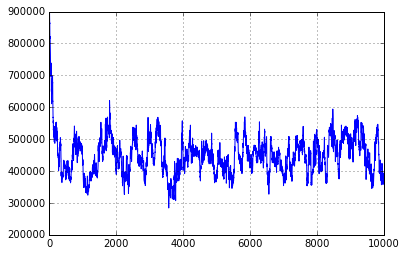

In [36]:
X = np.arange(0,len(H_stor),1)
plt.figure(1)
plt.grid()
plt.plot(X,H_stor,"-")
plt.show()           

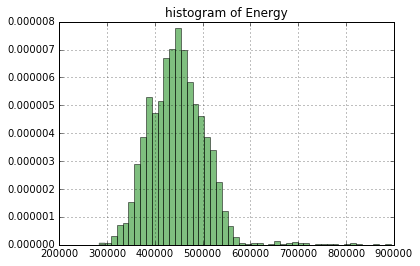

In [37]:
num_bins =50
plt.grid()
plt.hist(H_stor,num_bins, normed= 1.0, facecolor='green', alpha = 0.5)
plt.title("histogram of Energy")
plt.show()

This provides sufficient evidence for system in thermal equilibrium.

### Measurement of average  absolute difference

In [38]:
def abs_diff(x):
    diff = abs(x[0]-x[1])+abs(x[1]-x[2])+abs(x[2]-x[3])+abs(x[3]-x[4])+abs(x[4]-x[0])
    return diff

In [39]:
ln = len(U_stor)
total_abs_diff = 0
Diff = []
for k in range(ln):
    U = U_stor[k]
    for l in range(N):
        x = U[l]
        diff = abs_diff(x)
        Diff.append(diff)
        total_abs_diff = total_abs_diff + diff
average_abs_diff    = total_abs_diff/float(ln*N) 

In [40]:
average_abs_diff 

65.200000000000003

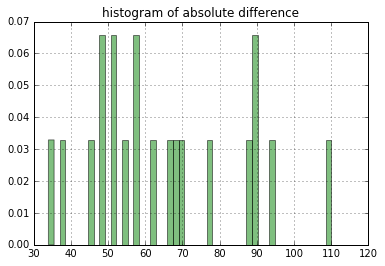

In [41]:
num_bins =50
plt.grid()
plt.hist(Diff,num_bins, normed= 1.0, facecolor='green', alpha = 0.5)
plt.title("histogram of absolute difference")
plt.show()

### Measurement of root mean square absolute difference

In [42]:
def rms_diff(x):
    diff = math.sqrt(abs(x[0]-x[1])**2+abs(x[1]-x[2])**2+abs(x[2]-x[3])**2+abs(x[3]-x[4])**2+abs(x[4]-x[0])**2)
    return diff

In [43]:
ln = len(U_stor)
total_rms_diff = 0
rms_Diff = []
for k in range(ln):
    U = U_stor[k]
    for l in range(N):
        x = U[l]
        diff = rms_diff(x)
        rms_Diff.append(diff)
        total_rms_diff = total_abs_diff + diff
rms_diff    = total_rms_diff/float(ln*N) 

In [44]:
rms_diff  

65.200247173536098

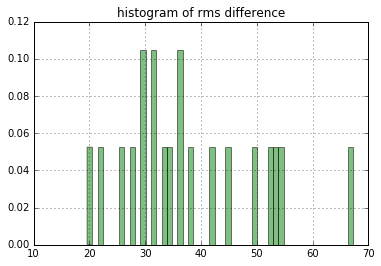

In [45]:
num_bins =50
plt.grid()
plt.hist(rms_Diff,num_bins, normed= 1.0, facecolor='green', alpha = 0.5)
plt.title("histogram of rms difference")
plt.show()

--------------------------------

## 1.3. Interpretation 

### 1.3.1. Most Probable Samples using Model -III : constrained by rms absolute difference

#### 1.3.1.2. Generation of many  samples and their actions

In [51]:
def simulation_III(N_sample,Max):
    Lstor = []
    Xstor = []
    k= 1
    while k < N_sample:
        x = sample_generator(Max)
        D =   distance_matrix(x)
        atn = action(D)
        Xstor.append(x)
        Lstor.append(atn)
        k = k+1
    return Xstor,Lstor     

#### 1.3.1.3. Histogram Plot of frequencies

In [53]:
N_sample = 100000
Xstor,Lstor = simulation_III(N_sample,Max)

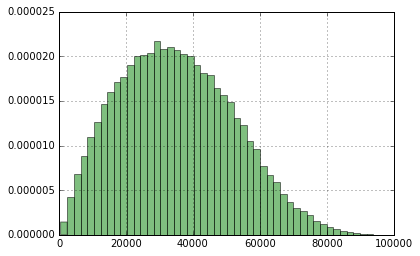

In [128]:
num_bins = 50
plt.grid()
plt.hist(Lstor,num_bins, normed= 1.0, facecolor='green', alpha = 0.5)
plt.show()

### 1.3.1.4.  Generate some sample

In [53]:
sample_required = 100

In [54]:
count = 1
while count < sample_required:
    x = sample_generator(Max)
    rmsdiff = math.sqrt(abs(x[0]-x[1])**2+abs(x[1]-x[2])**2+abs(x[2]-x[3])**2+abs(x[3]-x[4])**2+abs(x[4]-x[0])**2)
    D =   distance_matrix(x)
    act = action(D)
    if act > 20000 and act < 40000:
        '''rms_diff constraint'''
        if rmsdiff < 70 and rmsdiff > 50: 
            count = count+1
            print "rms test passed!",x,act
   

rms test passed! [22 31 34 36 63] 23213.3113095
rms test passed! [ 7 13 35 39 50] 33691.0412054
rms test passed! [18 46 51 61 62] 31851.0262931
rms test passed! [ 1  5 24 25 48] 35954.8593645
rms test passed! [17 37 47 52 68] 37716.8213328
rms test passed! [ 4 40 46 48 56] 39837.2864565
rms test passed! [17 33 45 46 68] 36706.1095915
rms test passed! [ 7 19 29 30 60] 39387.868137
rms test passed! [21 46 58 62 67] 34223.4073232
rms test passed! [14 23 27 39 60] 32757.3684971
rms test passed! [23 25 37 54 68] 38547.9912041
rms test passed! [ 9 35 36 38 64] 37754.3796817
rms test passed! [ 1 10 12 21 51] 36992.1945171
rms test passed! [ 7 12 20 40 52] 37750.4521181
rms test passed! [ 4 11 21 24 47] 27705.7997514
rms test passed! [27 35 38 66 68] 34682.9450353
rms test passed! [ 6 21 24 41 55] 37746.4051962
rms test passed! [ 8 17 19 20 57] 33609.5413481
rms test passed! [18 37 53 60 63] 35902.0551094
rms test passed! [12 25 30 53 57] 37347.9295182
rms test passed! [18 29 30 42 63] 30143.1

Take these samples and buy lottery! Enjoy!

### 1.3.2. Most Probable Samples using Model -I : without any constraint from thermalization

#### 1.3.2.1. Calculation of action in each sample

In [57]:
def action_I(x):
    act =  0.5*((x[0] -x[1])**2 + (x[1] -x[2])**2 + (x[2] -x[3])**2  +(x[3] -x[4])**2)
    return act

#### 1.3.2.2. Generation of many (N_samples) samples and their actions

In [58]:
def simulation_I(N_sample,Max):
    Lstor = []
    Xstor = []
    k = 1
    while k < N_sample:
        x = sample_generator(Max)
        atn = action_I(x)
        Xstor.append(x)
        Lstor.append(atn)
        k = k+1
    return Xstor,Lstor    

#### 1.3.2.3. Histogram Plot of frequencies

In [59]:
N_sample = 10000
Xstor,Lstor = simulation_I(N_sample,Max)

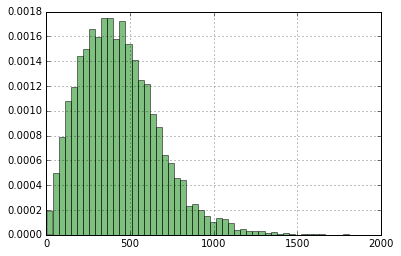

In [60]:
plt.grid()
plt.hist(Lstor,num_bins, normed= 1.0, facecolor='green', alpha = 0.5)
plt.show()

### 1.3.2.4.  Generate some sample

In [61]:
sample_required = 100

In [62]:
k = 1
while k < sample_required:
    x = sample_generator(Max)
    act = action_I(x)
    if act > 250 and act < 350:
        print x,act
        k = k+1

[14 27 29 43 56] 269.0
[11 21 42 48 54] 306.5
[ 3  6  9 13 35] 259.0
[ 6 20 33 37 51] 288.5
[ 8 24 27 34 52] 319.0
[10 18 22 34 55] 332.5
[ 2 14 19 34 49] 309.5
[10 23 31 35 52] 269.0
[17 37 49 59 63] 330.0
[ 8 29 43 50 52] 345.0
[ 3 10 15 30 50] 349.5
[ 7 12 22 40 52] 296.5
[ 8 12 28 42 57] 346.5
[16 19 31 35 58] 349.0
[14 36 50 51 53] 342.5
[ 1  7 18 28 49] 349.0
[21 32 34 54 55] 263.0
[15 31 45 53 56] 262.5
[20 26 42 53 64] 267.0
[ 5 13 31 33 45] 268.0
[ 5  9 20 22 42] 270.5
[11 27 32 48 53] 281.0
[11 14 21 34 53] 294.0
[10 27 43 47 50] 285.0
[22 38 50 52 68] 330.0
[13 27 30 38 55] 279.0
[ 8 13 15 26 49] 339.5
[20 24 42 53 60] 255.0
[ 7 20 38 46 48] 280.5
[25 43 45 49 63] 270.0
[21 31 51 58 62] 282.5
[19 24 26 50 59] 343.0
[16 27 46 53 61] 297.5
[14 25 37 44 62] 319.0
[ 2 16 18 39 44] 333.0
[23 29 39 48 66] 270.5
[14 24 35 48 64] 323.0
[17 32 39 56 60] 289.5
[ 8 14 21 26 48] 297.0
[ 2  6 13 29 44] 273.0
[29 33 39 42 67] 343.0
[ 2 23 30 41 46] 318.0
[12 28 29 35 50] 259.0
[11 24 32 4

In [ ]:
Take these samples and buy lottery! Enjoy!